In [11]:
# pip install scikit-image

In [12]:
import os
from sklearn.preprocessing import StandardScaler
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage.transform import resize
import pandas as pd
from matplotlib.image import imread
from skimage.io import imread_collection
from PIL import Image
import seaborn as sns
from sklearn import decomposition, preprocessing, svm
import sklearn.metrics as metrics #confusion_matrix, accuracy_score
from time import sleep 
from tqdm.notebook import tqdm
import os
sns.set()
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model

In [13]:
# load the model
model = VGG16()
# restructure the model
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# summary
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [14]:
features = []
count=0
directory = './AD_2/'
for image in os.listdir(directory):
    image_path = directory+image
    
    # load the image
    img = load_img(image_path, target_size=(224, 224))
    # convert pixel to numpy array
    img = img_to_array(img)
    # reshape the image for the model
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    # preprocess the image
    img = preprocess_input(img)
    # extract features
    feature = model.predict(img, verbose=0)
    
    # store feature
    features.append(feature)
    count+=1
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [15]:
len(features)

6928

In [16]:
features_labels=[]
b=1
for i in range(6928):
    features_labels.append(b)
len(features_labels)

6928

In [17]:
# for image in os.listdir('Desktop/MCI_2/'):
#     image_path='Desktop/MCI_2/'+image
#     print(image_path)

In [18]:
count= 0
b=0
directory = './MCI_2/'
for image in os.listdir(directory):
    image_path = directory+image
    
    # load the image
    img = load_img(image_path, target_size=(224, 224))
    # convert pixel to numpy array
    img = img_to_array(img)
    # reshape the image for the model
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    # preprocess the image
    img = preprocess_input(img)
    # extract features
    feature = model.predict(img, verbose=0)
    
    # store feature
    features.append(feature)
    features_labels.append(b)
    count+=1
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [19]:
len(features)

13856

In [20]:
features[12211]

array([[0.       , 1.4952928, 0.8174894, ..., 1.8247111, 0.       ,
        0.       ]], dtype=float32)

In [31]:

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(features, features_labels, test_size = 0.2)


In [32]:
#converting 3d to 2d
train_x = [np.concatenate(i) for i in train_x]
test_x = [np.concatenate(i) for i in test_x]
train_x

[array([0.       , 1.1160748, 0.       , ..., 0.3601572, 0.       ,
        0.       ], dtype=float32),
 array([0.        , 1.2990247 , 0.12201819, ..., 1.3476583 , 0.        ,
        0.        ], dtype=float32),
 array([0.0000000e+00, 9.0989363e-01, 1.9938350e-03, ..., 2.8254793e+00,
        0.0000000e+00, 5.1997679e-01], dtype=float32),
 array([0.        , 3.9934368 , 0.39615613, ..., 0.        , 0.        ,
        0.36765057], dtype=float32),
 array([0.       , 1.4172319, 0.       , ..., 0.       , 0.       ,
        0.0256142], dtype=float32),
 array([2.8795795 , 0.84773684, 0.76282895, ..., 6.2212377 , 0.        ,
        0.48657283], dtype=float32),
 array([0.       , 3.892329 , 0.       , ..., 0.762708 , 2.1966145,
        0.       ], dtype=float32),
 array([1.282898  , 1.6051015 , 0.        , ..., 2.5659525 , 0.        ,
        0.24177665], dtype=float32),
 array([0.     , 1.28957, 0.     , ..., 0.     , 0.     , 0.     ],
       dtype=float32),
 array([0.       , 1.6037107,

In [33]:
scaler = StandardScaler()
scaler.fit(train_x)

StandardScaler()

In [40]:
from sklearn.feature_selection import SelectFromModel
from sklearn. linear_model import Lasso

sel_ = SelectFromModel(Lasso(alpha=0.1, random_state=10))
sel_.fit(scaler.transform(train_x), train_y)

X_train_selected = sel_.transform(scaler.transform(train_x))
X_test_selected = sel_.transform(scaler.transform(test_x))

SelectFromModel(estimator=Lasso(alpha=0.1, random_state=10))

In [41]:
X_train_selected = sel_.transform(scaler.transform(train_x))
X_test_selected = sel_.transform(scaler.transform(test_x))

In [42]:
(X_train_selected)

array([[ 2.10282295, -0.3075689 , -0.65747033, ...,  0.75004046,
        -1.18769758, -1.24870496],
       [-0.0572567 , -0.14269593, -0.03951568, ..., -0.51537198,
         0.10452011, -0.54243208],
       [-0.55829269, -0.3075689 , -0.53639832, ..., -0.51537198,
         0.85634754, -0.54214918],
       ...,
       [ 1.54692882, -0.3075689 ,  3.21750919, ...,  4.8741858 ,
        -1.3253065 ,  2.38811694],
       [-0.91742366, -0.3075689 , -0.65747033, ..., -0.51537198,
         0.42102103,  0.26927163],
       [-0.42761862, -0.3075689 ,  2.19129835, ..., -0.51537198,
        -1.3253065 , -1.35135589]])

Accuracy :  0.8560988812702995
Accuracy :  0.8593073593073594


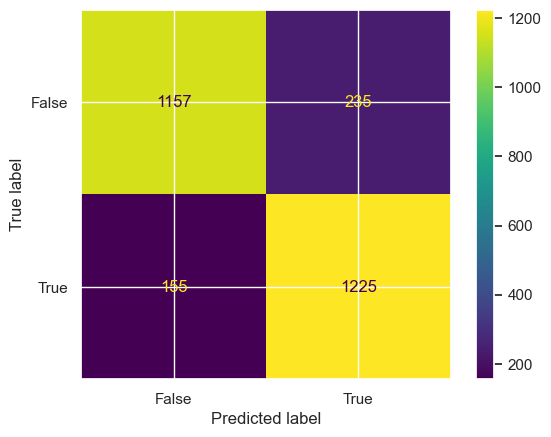

In [46]:
from sklearn import metrics
#train SVM model
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train_selected, train_y)
#store predictions and ground truth
y_pred = clf.predict(X_train_selected)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

#Now, use the SVM model to predict Test data
y_pred = clf.predict(X_test_selected)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))


confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy :  0.8995849873691808
Accuracy :  0.9094516594516594


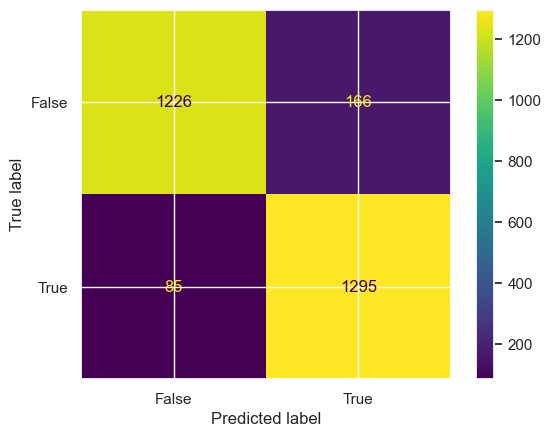

In [47]:
#Train a SVM using polynomial kernel with degree of 2
clf = svm.SVC(kernel = 'poly', degree = 2)
clf.fit(X_train_selected, train_y)

#store predictions and ground truth
y_pred = clf.predict(X_train_selected)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

#Now, use the SVM model to predict Test data
y_pred = clf.predict(X_test_selected)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy :  0.9392818477084085
Accuracy :  0.9440836940836941


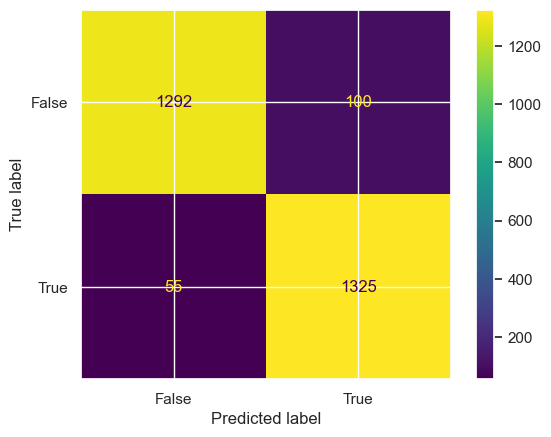

In [48]:
#Train a SVM using RBF kernel
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train_selected, train_y)

#store predictions and ground truth
y_pred = clf.predict(X_train_selected)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

#Now, use the SVM model to predict Test data
y_pred = clf.predict(X_test_selected)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy: (training data) 1.0
Accuracy:(testing data) 0.9440836940836941


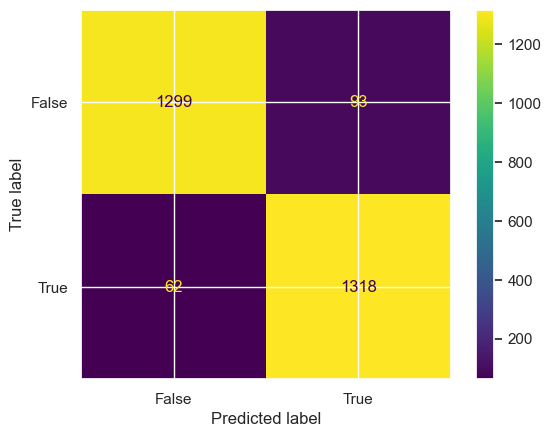

In [71]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train_selected, train_y)

y_pred1 = regressor.predict(X_train_selected)
y_pred_2=[]
for j in y_pred1:
  if j>=0.5 :
    j=1
    y_pred_2.append(j)
  else:
    j=0
    y_pred_2.append(j)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(train_y, y_pred_2)
print("Accuracy: (training data)", accuracy)

y_pred = regressor.predict(X_test_selected)
y_pred_2=[]
for j in y_pred:
  if j>=0.5 :
    j=1
    y_pred_2.append(j)
  else:
    j=0
    y_pred_2.append(j)
accuracy = accuracy_score(test_y, y_pred_2)
print("Accuracy:(testing data)", accuracy)

confusion_matrix = metrics.confusion_matrix(test_y, y_pred_2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Accuracy: (training data) 1.0
Accuracy:(testing data) 0.9458874458874459


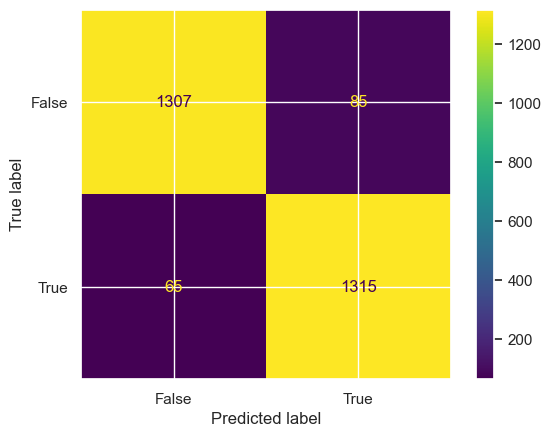

In [72]:
#Random Forest
#LASSO FEATURE SELECTION
from sklearn.ensemble import RandomForestRegressor

 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train_selected, train_y)

y_pred1 = regressor.predict(X_train_selected)
y_pred_2=[]
for j in y_pred1:
  if j>=0.5 :
    j=1
    y_pred_2.append(j)
  else:
    j=0
    y_pred_2.append(j)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(train_y, y_pred_2)
print("Accuracy: (training data)", accuracy)

y_pred = regressor.predict(X_test_selected)
y_pred_2=[]
for j in y_pred:
  if j>=0.5 :
    j=1
    y_pred_2.append(j)
  else:
    j=0
    y_pred_2.append(j)
accuracy = accuracy_score(test_y, y_pred_2)
print("Accuracy:(testing data)", accuracy)

confusion_matrix = metrics.confusion_matrix(test_y, y_pred_2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy: (training data) 1.0
Accuracy:(testing data) 0.9448051948051948


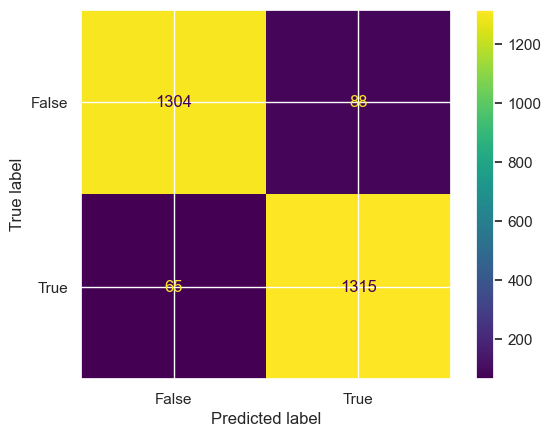

In [73]:
#Random Forest
#LASSO FEATURE SELECTION
from sklearn.ensemble import RandomForestRegressor

 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 5000, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train_selected, train_y)

y_pred1 = regressor.predict(X_train_selected)
y_pred_2=[]
for j in y_pred1:
  if j>=0.5 :
    j=1
    y_pred_2.append(j)
  else:
    j=0
    y_pred_2.append(j)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(train_y, y_pred_2)
print("Accuracy: (training data)", accuracy)

y_pred = regressor.predict(X_test_selected)
y_pred_2=[]
for j in y_pred:
  if j>=0.5 :
    j=1
    y_pred_2.append(j)
  else:
    j=0
    y_pred_2.append(j)
accuracy = accuracy_score(test_y, y_pred_2)
print("Accuracy:(testing data)", accuracy)

confusion_matrix = metrics.confusion_matrix(test_y, y_pred_2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [104]:
list(y_pred1)
y_pred1_labels=[]
for i in y_pred1:
    if (i<=0.50):
        y_pred1_labels.append("MCI category")
    elif (i>0.50 and i<=0.70):
        y_pred1_labels.append("Progression to AD ")
    else:
        y_pred1_labels.append(" AD category")


In [129]:
import pandas as pd
data=[y_pred1,y_pred1_labels]
df=pd.DataFrame(data)
(df.T[101:121])

,0,1
101,0.9364,AD category
102,0.9986,AD category
103,0.835,AD category
104,0.987,AD category
105,0.0,MCI category
106,0.0,MCI category
107,0.0728,MCI category
108,0.8106,AD category
109,0.0298,MCI category
110,0.0058,MCI category


In [94]:
#logistic regression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
logreg =  LogisticRegression()
logreg.fit(train_x,train_y)

LogisticRegression()

Accuracy Training data:  1.0
Accuracy Testing data:  1.0


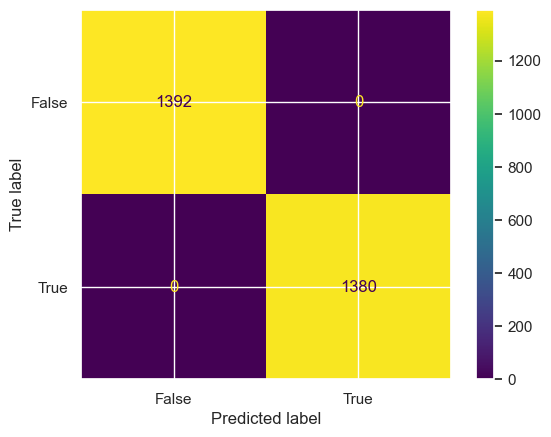

In [95]:
#store predictions and ground truth
y_pred = logreg.predict(train_x)
y_true = train_y

#assess the performance of the SVM with linear kernel on Training data
print('Accuracy Training data: ', metrics.accuracy_score(y_true, y_pred))

#Now, use the SVM model to predict Test data
y_pred = logreg.predict(test_x)
y_true = test_y

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy Testing data: ', metrics.accuracy_score(y_true, y_pred))

confusion_matrix = metrics.confusion_matrix(test_y, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [76]:
# ENSEMBLE LEARNING


# Bagged Decision Trees for Classification - necessary dependencies

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


In [77]:
#LASSO FEATURE SELECTION
# Voting Ensemble for Classification
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)

print("Training data accuracy")
results = model_selection.cross_val_score(ensemble, X_train_selected, train_y, cv=kfold)
print(results.mean())

print("Testing data accuracy")
results = model_selection.cross_val_score(ensemble, X_test_selected, test_y, cv=kfold)
print(results.mean())

Training data accuracy
0.9179003102284232
Testing data accuracy
0.9058372074903254


In [78]:

# AdaBoost Classification
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 70
kfold = model_selection.KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

print("Training data accuracy")
results = model_selection.cross_val_score(model, X_train_selected, train_y, cv=kfold)
print(results.mean())

print("Testing data accuracy")
results = model_selection.cross_val_score(model, X_test_selected, test_y, cv=kfold)
print(results.mean())

Training data accuracy
0.8634051719928515
Testing data accuracy
0.8672376178479599


In [79]:

import warnings
warnings.filterwarnings('ignore')
kfold = model_selection.KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)

print("Training data accuracy")
results = model_selection.cross_val_score(model, X_train_selected, train_y, cv=kfold)
print(results.mean())

print("Testing data accuracy")
results = model_selection.cross_val_score(model, X_test_selected, test_y, cv=kfold)
print(results.mean())


Training data accuracy
0.9380201534540173
Testing data accuracy
0.9152131002779006
